In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPool2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing \
import RandomFlip,RandomRotation,Rescaling,RandomContrast


In [6]:
train_df = image_dataset_from_directory('C:/Users/didic/Downloads/archive(3)/Face Mask Dataset/Train/',
                                       labels='inferred',
                                       label_mode='binary',
                                       interpolation='nearest',
                                       image_size=[128,128],
                                       batch_size=32,
                                       shuffle=True,
                                       )
valid_df = image_dataset_from_directory('C:/Users/didic/Downloads/archive(3)/Face Mask Dataset/Validation/',
                                       labels='inferred',
                                       label_mode='binary',
                                       interpolation='nearest',
                                       image_size=[128,128],
                                       batch_size=32,
                                       shuffle=True,
                                       )
test_df = image_dataset_from_directory('C:/Users/didic/Downloads/archive(3)/Face Mask Dataset/Test/',
                                       labels='inferred',
                                       label_mode='binary',
                                       interpolation='nearest',
                                       image_size=[128,128],
                                       batch_size=32,
                                       shuffle=True,
                                       )

Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 992 files belonging to 2 classes.


In [7]:
class_name = train_df.class_names

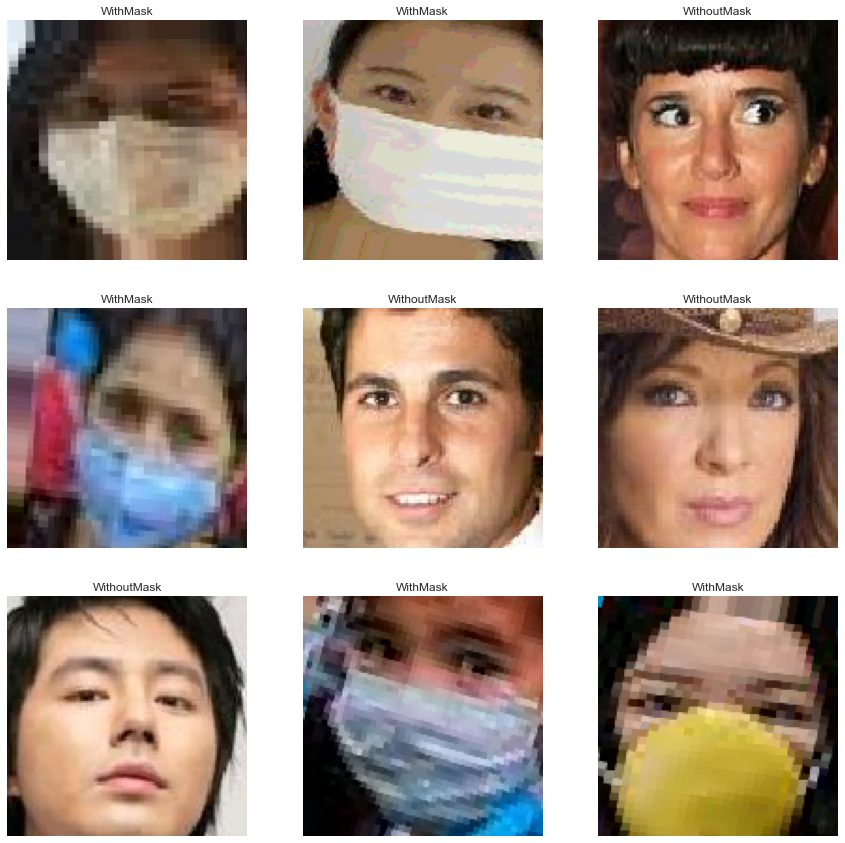

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

plt.figure(figsize=(15,15))
for img, label in train_df.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(class_name[int(label[i])])
        plt.axis('off')

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_df = train_df.cache().prefetch(buffer_size=AUTOTUNE)
valid_df = valid_df.cache().prefetch(buffer_size=AUTOTUNE)
test_df = test_df.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
model = Sequential([
    Rescaling(1.0/255,input_shape=(128,128,3)),
    RandomFlip(),
    RandomRotation(0.4),
    RandomContrast(0.3),
    
    # First Layer
    layers.Conv2D(filters=64, kernel_size=5, activation='relu',padding='same'),
    layers.MaxPool2D(),
    
    # Second Layer
    layers.Conv2D(filters=128, kernel_size=5, activation='relu',padding='same'),
    layers.MaxPool2D(),
    
    # Third Layer
    layers.Conv2D(filters=128, kernel_size=5, activation='relu',padding='same'),
    layers.MaxPool2D(),
    
    # Forth Layer
    layers.Conv2D(filters=128, kernel_size=5, activation='relu',padding='same'),
    layers.MaxPool2D(),
    
    # Fivth Layer
    layers.Conv2D(filters=128, kernel_size=5, activation='relu',padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    
    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=6,activation='relu'),
    layers.Dense(units=1,activation='sigmoid')
    
])

In [7]:
model.compile(
    optimizer=tf.optimizers.Adam(epsilon=0.02),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [8]:
history = model.fit(train_df,
                   validation_data=valid_df,
                   epochs=20,
                   batch_size=32,
                   )

Epoch 1/20
313/313 [==============================] - 410s 1s/step - loss: 0.6205 - binary_accuracy: 0.6561 - val_loss: 0.3093 - val_binary_accuracy: 0.8763
Epoch 2/20
313/313 [==============================] - 394s 1s/step - loss: 0.3456 - binary_accuracy: 0.8577 - val_loss: 0.3087 - val_binary_accuracy: 0.8800
Epoch 3/20
313/313 [==============================] - 402s 1s/step - loss: 0.3055 - binary_accuracy: 0.8821 - val_loss: 0.3027 - val_binary_accuracy: 0.8725
Epoch 4/20
313/313 [==============================] - 402s 1s/step - loss: 0.2740 - binary_accuracy: 0.8880 - val_loss: 0.3285 - val_binary_accuracy: 0.8612
Epoch 5/20
313/313 [==============================] - 402s 1s/step - loss: 0.2730 - binary_accuracy: 0.8842 - val_loss: 0.2857 - val_binary_accuracy: 0.8813
Epoch 6/20
313/313 [==============================] - 401s 1s/step - loss: 0.2484 - binary_accuracy: 0.9004 - val_loss: 0.3016 - val_binary_accuracy: 0.8838
Epoch 7/20
313/313 [==============================] - 400s

<AxesSubplot:>

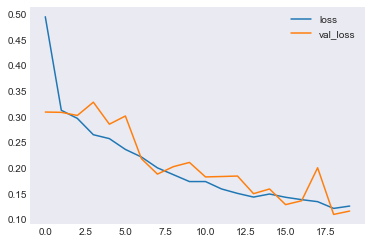

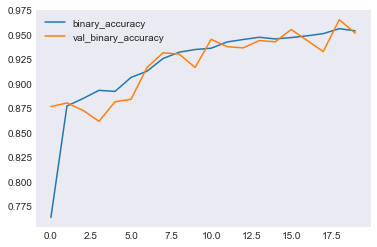

In [9]:
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_df.loc[:,['loss','val_loss']].plot()
hist_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot()

In [3]:
# model.save('face_detection.h5')
model=keras.models.load_model('face_detection.h5')

In [13]:
def get_class(img):
    img_arr = keras.preprocessing.image.img_to_array(img)
    img_arr = tf.expand_dims(img_arr, 0)
    pred = model.predict(img_arr)
    pred = (pred>0.5).astype(np.int)
    return class_name[pred[0][0]]

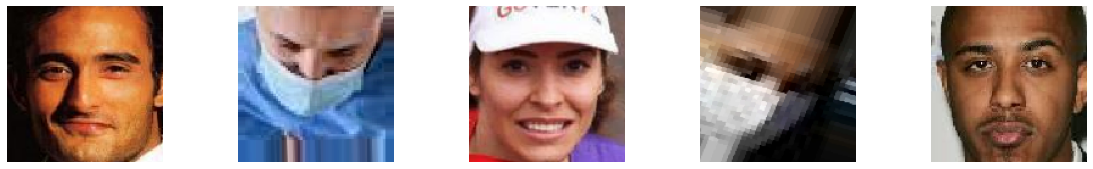

In [14]:
# start the prediction
plt.figure(figsize=(20,20))
test = img[:5]
for i in range(5):
        ax = plt.subplot(6,5,i+1)
        plt.imshow(img[i])
        plt.axis('off')


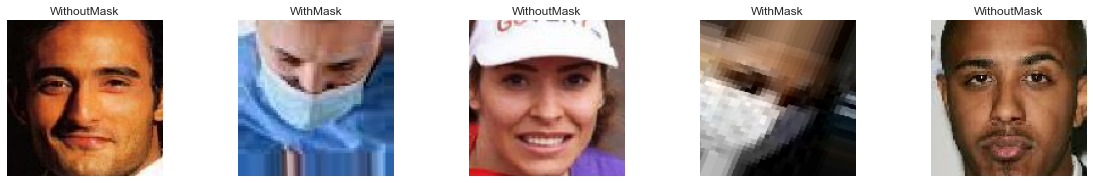

In [15]:
plt.figure(figsize=(20,20))
for img , _ in test_df.take(5):
    for i in range(5):
        ax = plt.subplot(6,5,i+1)
        plt.imshow(test[i])
        plt.title(get_class(test[i]))
        plt.axis('off')

In [89]:
from PIL import Image
pic=[]
pic.append(Image.open('C:/Users/didic/Desktop/New folder/Soh_Zhi_Chen_Photo.png'))

(-0.5, 572.5, 738.5, -0.5)

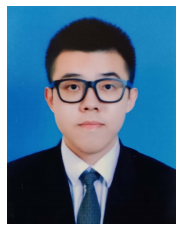

In [90]:
plt.imshow(pic[0])
plt.axis('off')

TypeError: float() argument must be a string or a number, not 'PngImageFile'

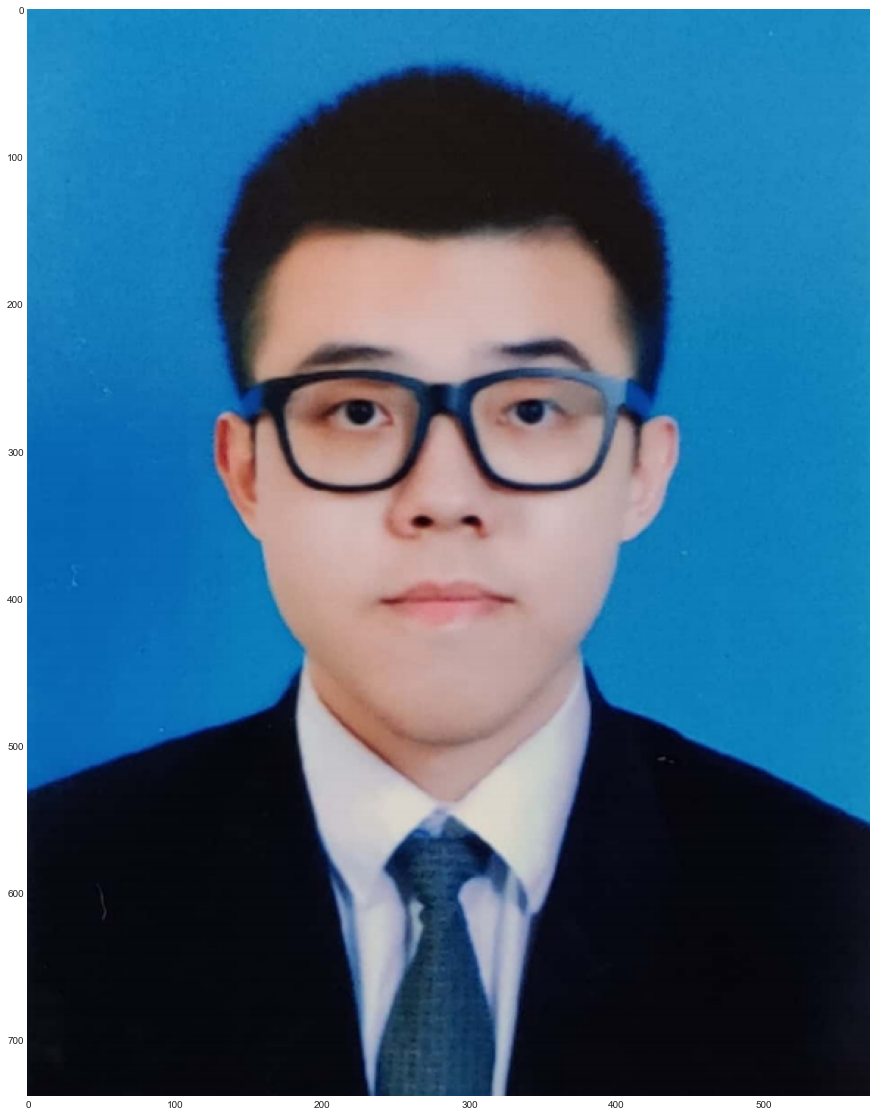

In [92]:
plt.figure(figsize=(20,20))
# for img , _ in test_df.take(5):
#     for i in range(5):
#         ax = plt.subplot(6,5,i+1)
plt.imshow(pic[0])
plt.title(get_class(pic))
plt.axis('off')